
#                              Assignment

---




**Name- Shubham Kamboj**

**Roll No.- DSTC-22/23-014**


---





# **Red Wine Quality Prediction- EDA + Classification using 5 different methods**

**Is quality in wine subjective or objective?**

Read this very interesting wine blog https://wineandotherstories.com/the-six-attributes-of-quality-in-wine/ where the author poses the question of "Do I like the wine?" implying a personal preference vs "Is it a good wine?" implying quality as an objective factor of measurement. Dataset source: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

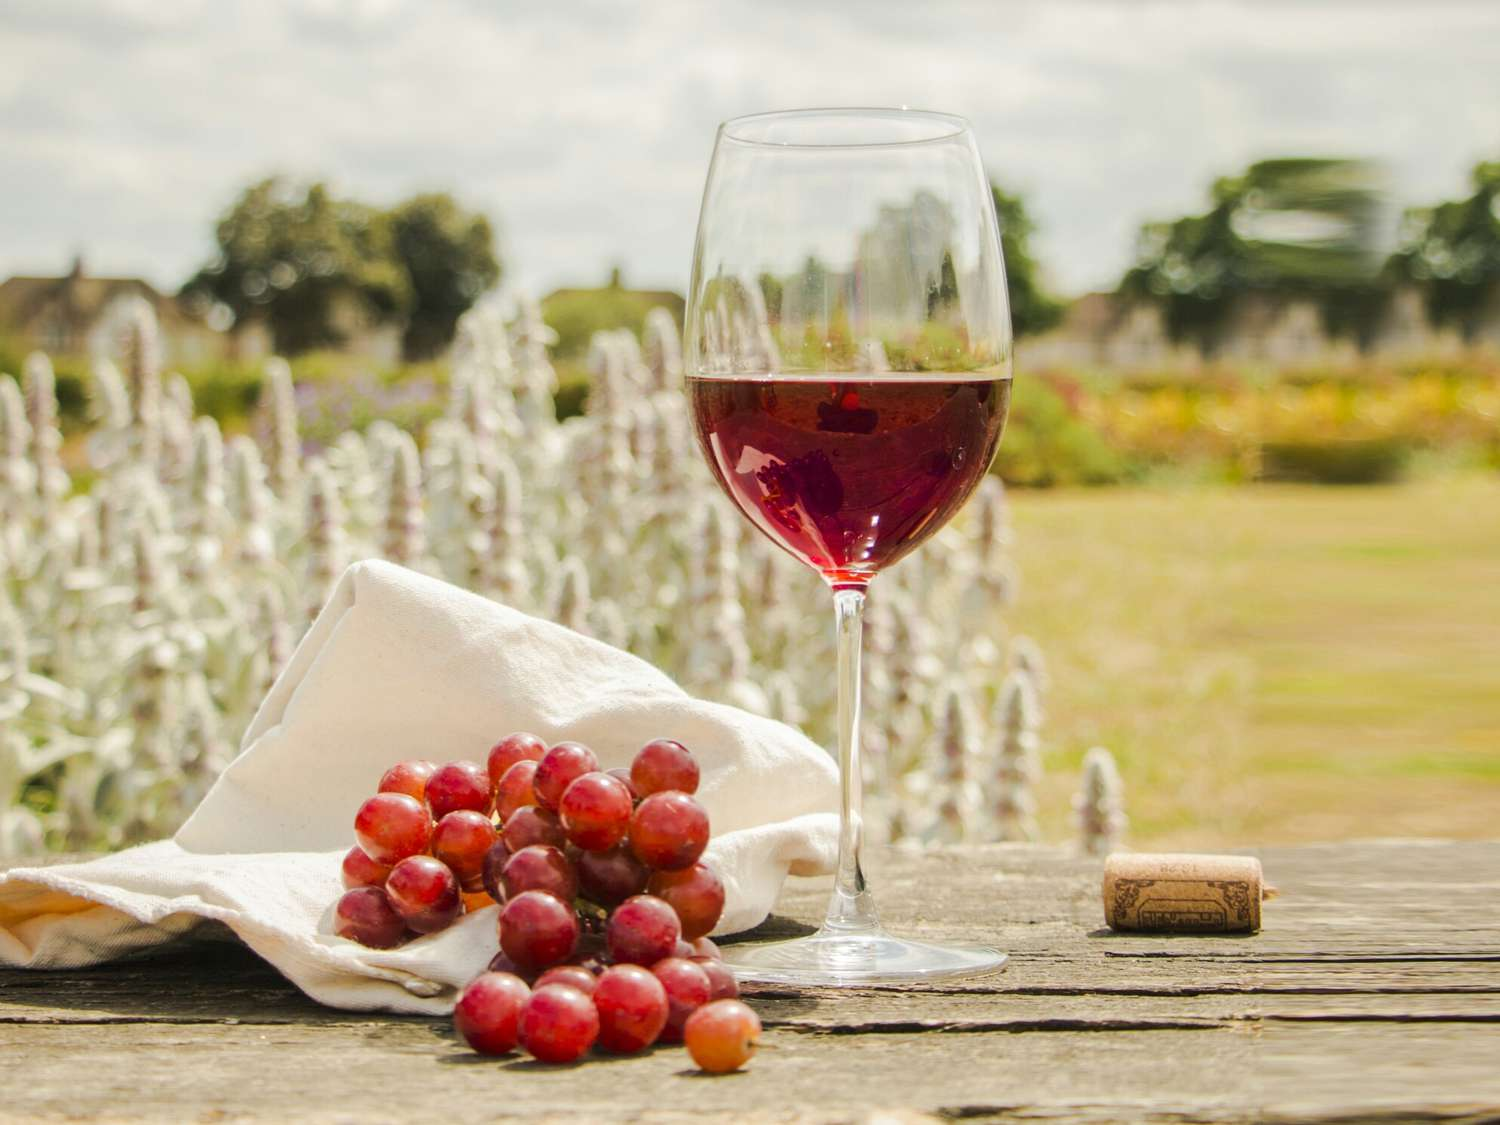


**Explanation of the variables**

**Fixed Acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

**Volatile Acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

**Citric Acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines.

**Residual Sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.

**Chlorides:** the amount of salt in the wine.

**Free Sulfur Dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.

**Total Sulfur Dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

**Density:** the density of water is close to that of water depending on the percent alcohol and sugar content.

**pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

**Sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

**Alcohol:** this is the percent alcohol content of the wine.

**Quality:** output variable (based on sensory data, score between 3 and 8).

# **Importing necessary packages**

In [ ]:
# Step 1: Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,  mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# **Loading the dataset**

In [ ]:
#loading the dataset
df = pd.read_csv('winequality-red.csv')


In [ ]:
df.shape

(1599, 12)

# Overview and statistical summary (Data Pre-Processing)

In [ ]:
# Data informtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# **Data cleaning**

In [ ]:
#checking for null values
df.isna().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset does not contain any null values.

In [ ]:
# Removing the duplicate data
df.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

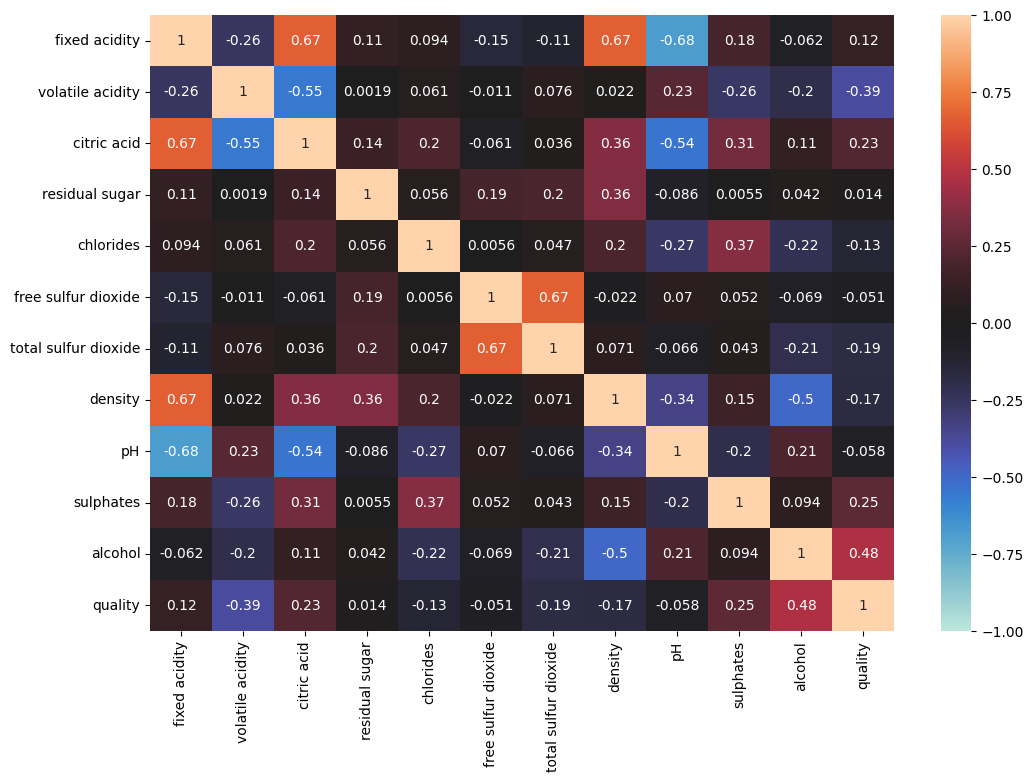

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='icefire',annot=True)

In [ ]:
# Selecting highly correlated features
relevant_features= abs(df.corr()['quality'])[abs(df.corr()['quality'])>0.1]

In [ ]:
relevant_features.nlargest(10)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
Name: quality, dtype: float64

[Text(0, 0, '10.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '681.0'),
 Text(0, 0, '638.0'),
 Text(0, 0, '199.0'),
 Text(0, 0, '18.0')]

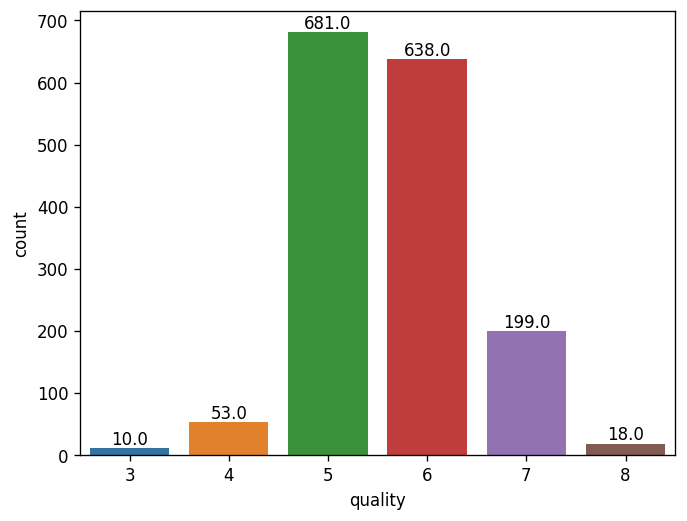

In [ ]:
# Checking Wine Quality Distribution
plt.figure(dpi=120)
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0], fmt='%.1f')

As per given in the dataset,

Quality >= 6.5 is "Good"

Quality < 6.5 is "Bad"

So converting the quality into "Good" and "Bad"

3, 4, 5 -> 0 (Bad Quality)

6, 7, 8 -> 1 (Good Quality)

In [ ]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6.5 else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# **Data Imbalance**

Text(0.5, 0, 'Before Balancing')

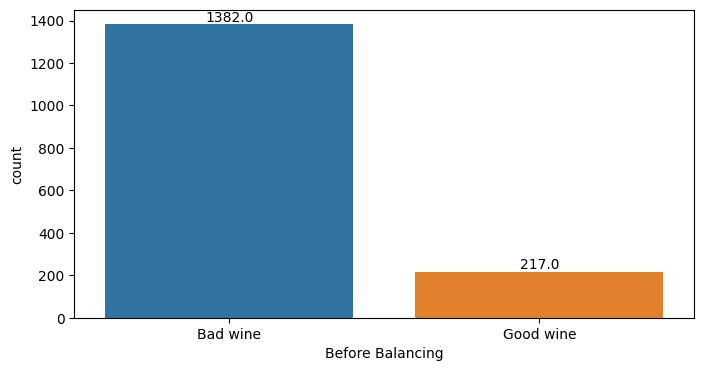

In [ ]:
# Checking for data imbalance
plt.figure(figsize=(8, 4),dpi=100)

ax= sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks([0,1], ['Bad wine', 'Good wine'])
plt.xlabel("Before Balancing")

As we can see, the data is imbalanced with a much lower number of "good quality" data points compared to "bad quality." If we simply oversample the minority class, we may achieve high accuracy, but this approach could potentially lead to overfitting, as the model may simply memorize the data during training.

On the other hand, undersampling the majority class would result in a significant reduction in the overall number of data points, which could negatively impact the model's performance. To address this issue, a better approach would be to undersample the majority class by 85% and then oversample the minority class. This strategy can lead to improved accuracy while also reducing the risk of overfitting the data.

In [ ]:
# X -> Dependent Features, Y -> Independent Feature
X=df[['alcohol','sulphates','volatile acidity','density','total sulfur dioxide','citric acid']].values
y=df['quality'].values

In [ ]:
# Undersampling the majority class by 65%
X_over,y_over=RandomUnderSampler(sampling_strategy=0.85).fit_resample(X,y) #

Text(0.5, 0, 'After Balancing')

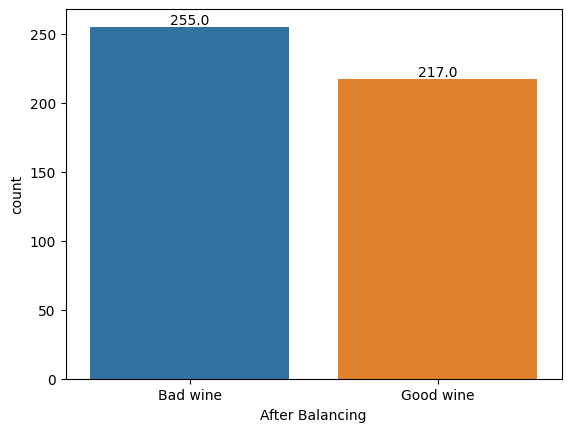

In [ ]:
# Data after balancing
ax=sns.countplot(data=df, x=y_over)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks([0,1], ['Bad wine', 'Good wine'])
plt.xlabel("After Balancing")

# **Exploratory data analysis**

In [ ]:
# Correlation Graphs
def corr_graph(x,y):
    sns.regplot(x=df[f'{x}'], y=df[f'{y}'], color = '#0e87cc',lowess=True,scatter_kws={'edgecolor':'black','alpha':.6},line_kws={"color": "red","linewidth":2})

Text(0.5, 1.0, 'Negative Correlation B/W Fixed Acidity & pH')

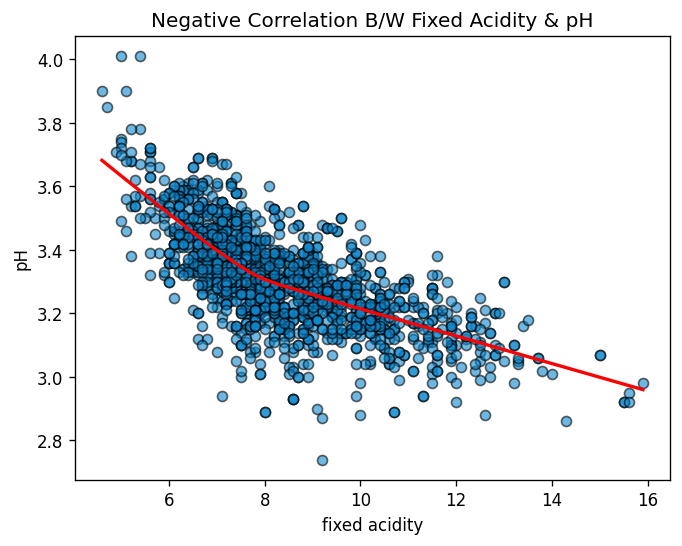

In [ ]:
# Negative Correlation B/W Fixed Acidity & pH
plt.figure(dpi=120)
corr_graph('fixed acidity','pH')
plt.title("Negative Correlation B/W Fixed Acidity & pH")

Text(0.5, 1.0, 'Positive Correlation B/W Fixed Acidity & Density')

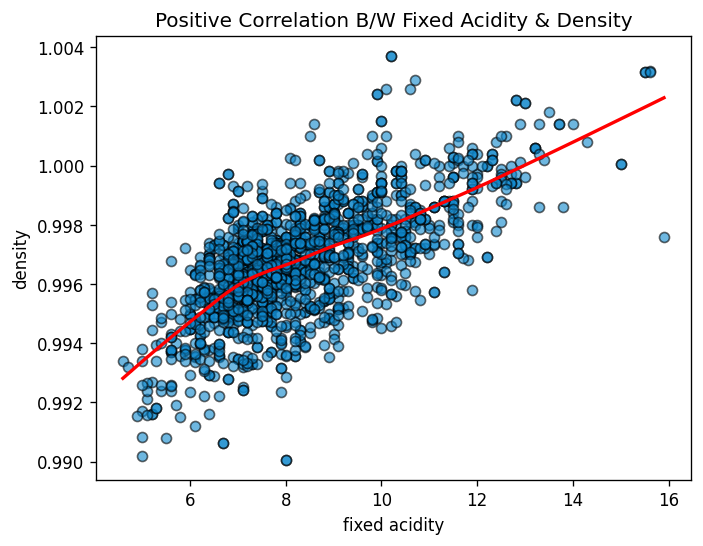

In [ ]:
# Positive Correlation B/W Fixed Acidity & Density
plt.figure(dpi=120)
corr_graph('fixed acidity','density')
plt.title("Positive Correlation B/W Fixed Acidity & Density")

Text(0.5, 1.0, 'Positive Correlation B/W Fixed Acidity & Citric Acid')

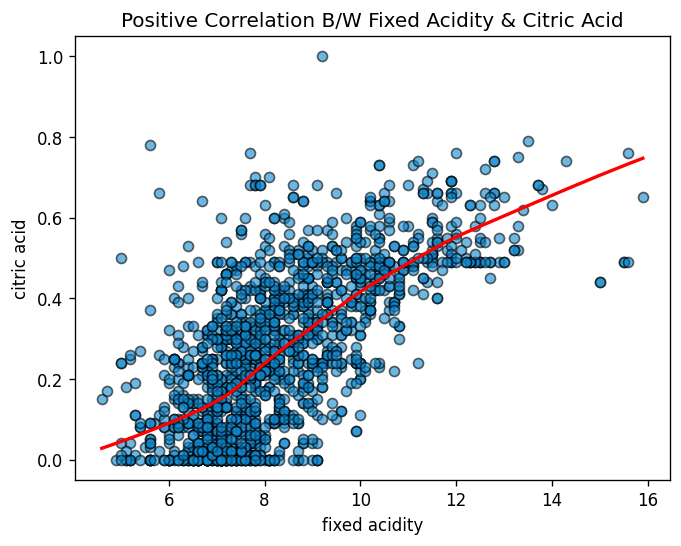

In [ ]:
# Positive Correlation B/W Fixed Acidity & Citric Acid
plt.figure(dpi=120)
corr_graph('fixed acidity','citric acid')
plt.title("Positive Correlation B/W Fixed Acidity & Citric Acid")

Data Distribution Skew

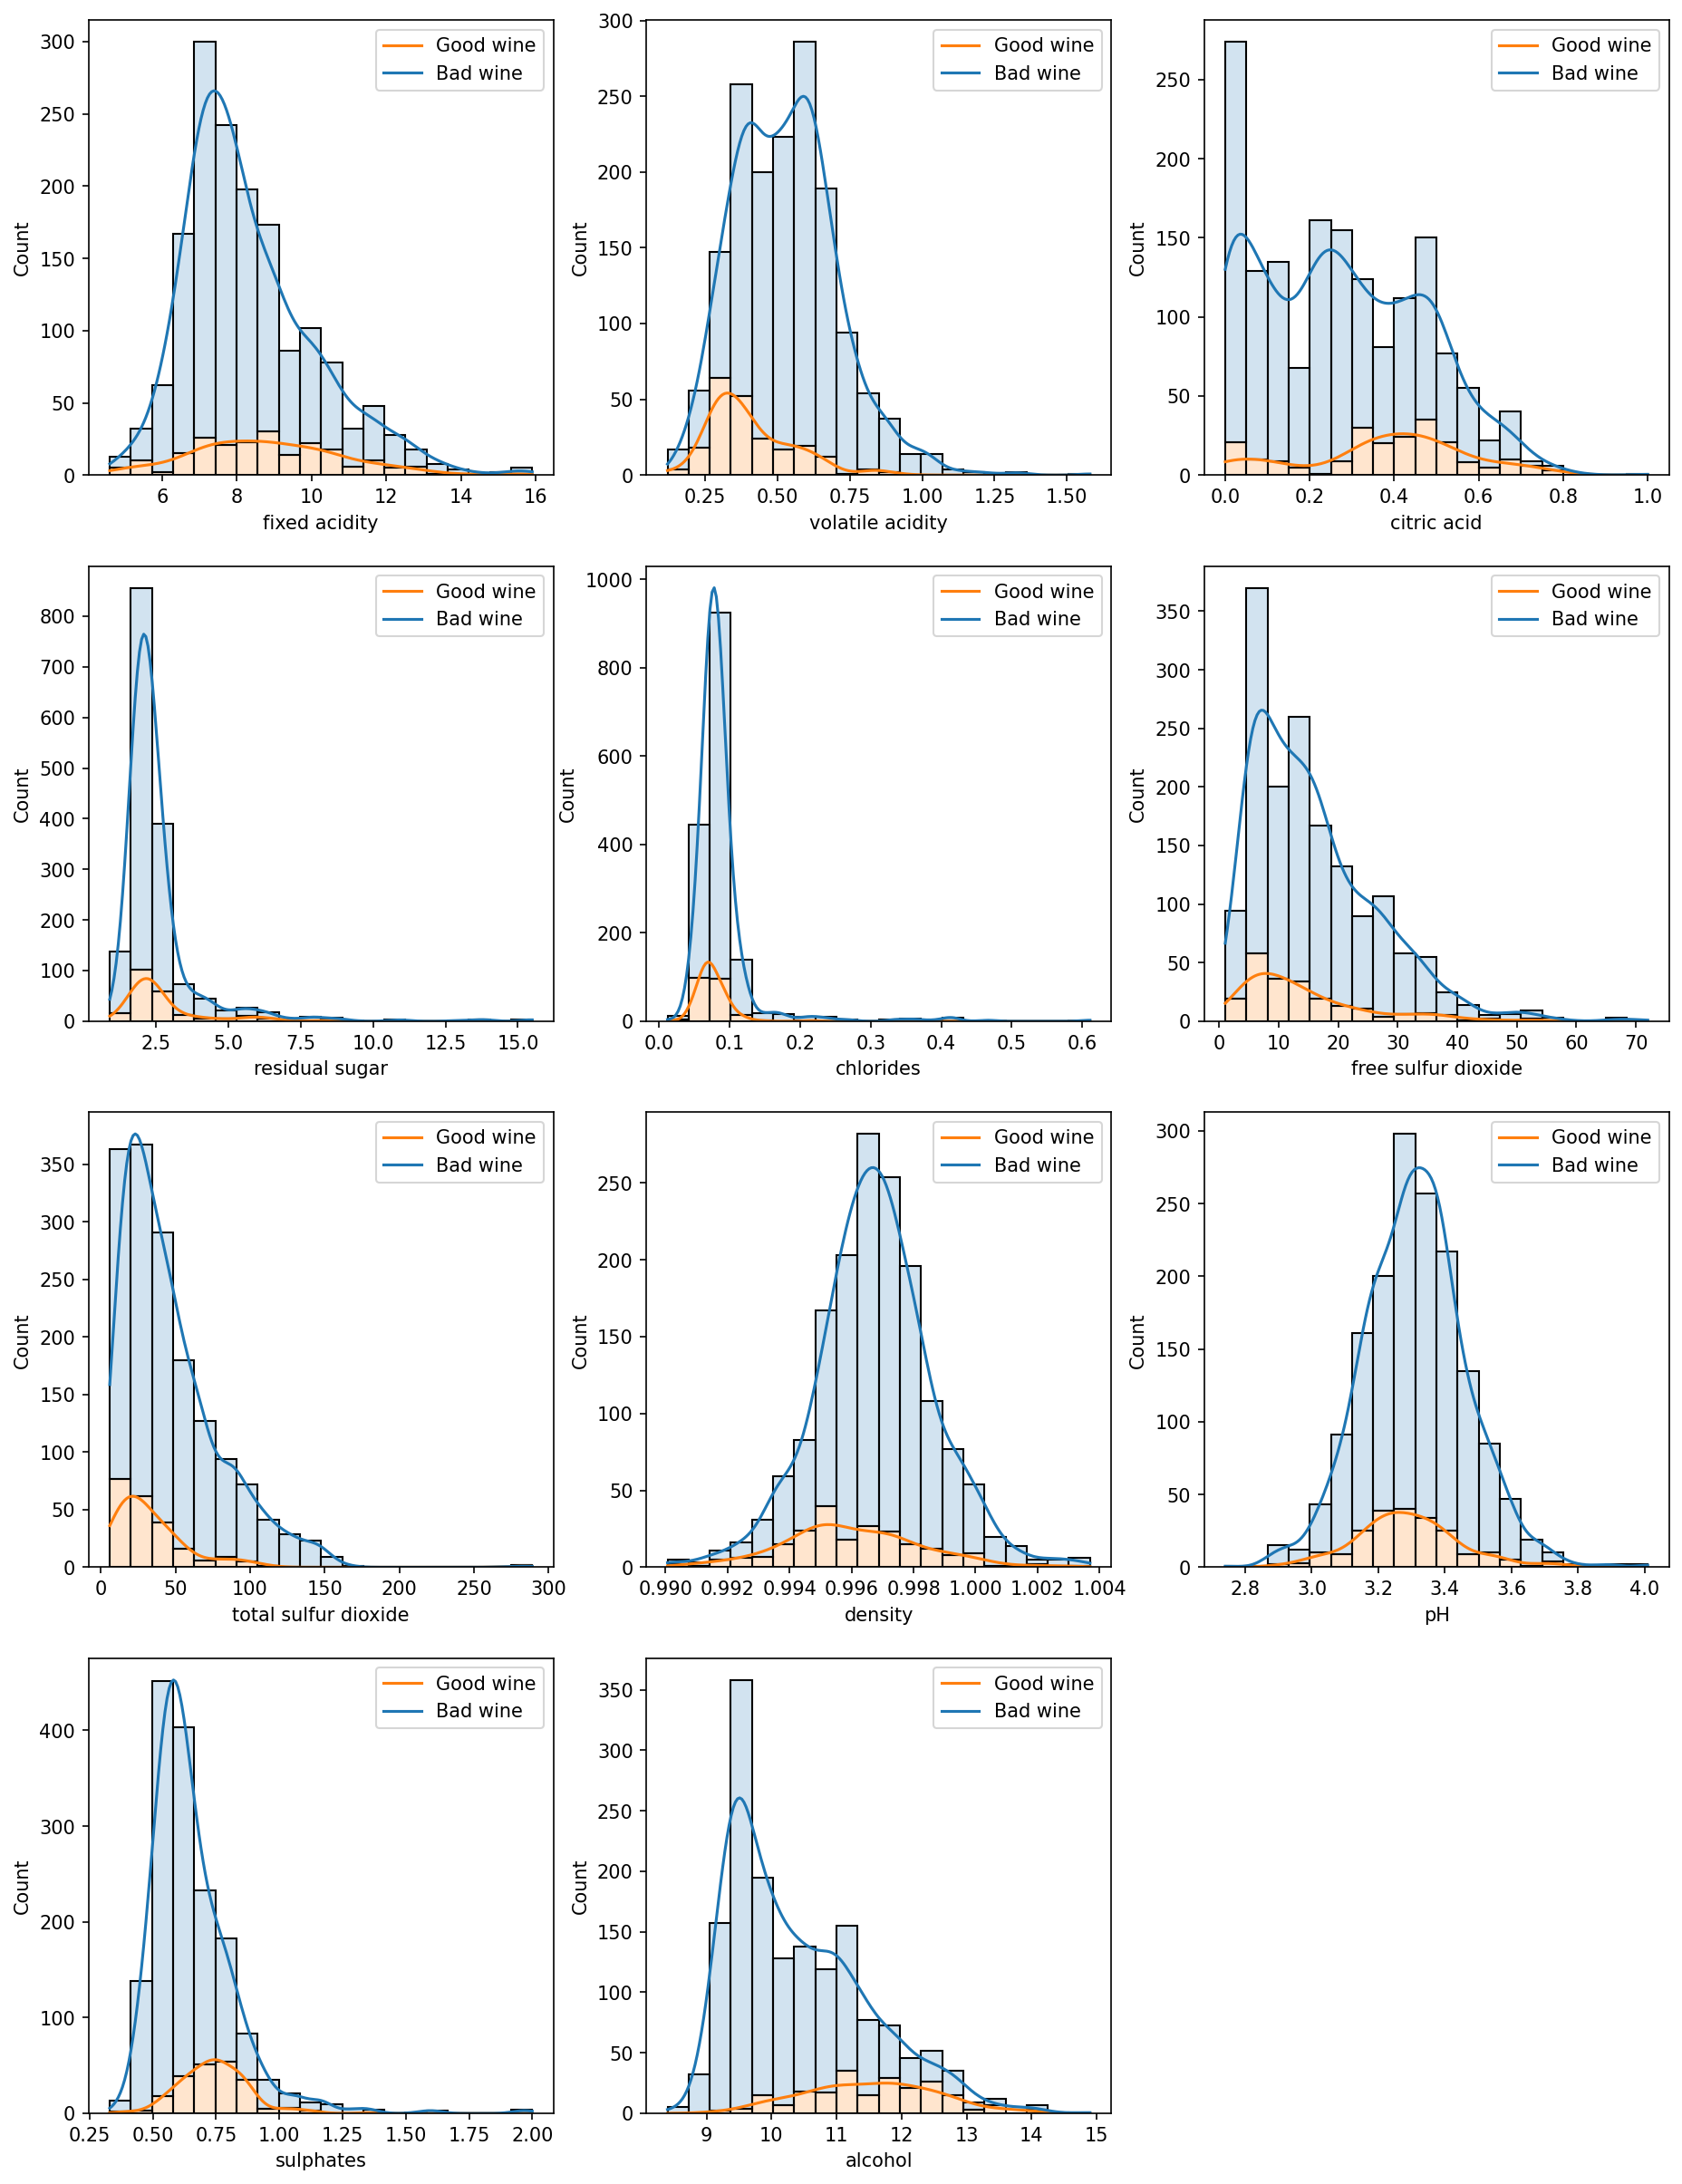

In [ ]:
plt.figure(figsize=(15, 20),dpi=150)
for i,j in enumerate(df.drop('quality',axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=df[f"{j}"], hue="quality", kde=True, bins=20, multiple="stack", alpha=.2)
    plt.legend(['Good wine','Bad wine'])

# **Splitting Data into Training and Testing Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(377, 6)

Logistic Regression:
Training Score: 0.7851458885941645
Validation Score: 0.7789473684210526
Mean Absolute Error: 0.22105263157894736


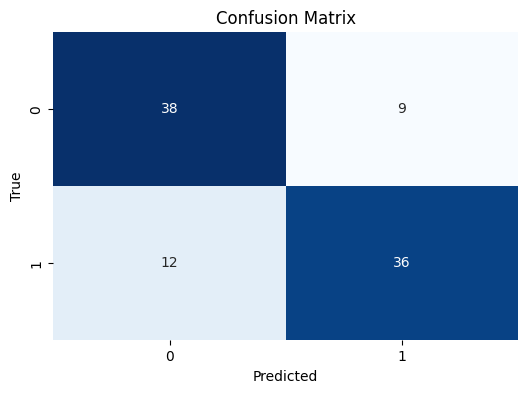

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        47
           1       0.80      0.75      0.77        48

    accuracy                           0.78        95
   macro avg       0.78      0.78      0.78        95
weighted avg       0.78      0.78      0.78        95

Accuracy Score: 77.89%


Decision Tree:
Training Score: 1.0
Validation Score: 0.7789473684210526
Mean Absolute Error: 0.22105263157894736


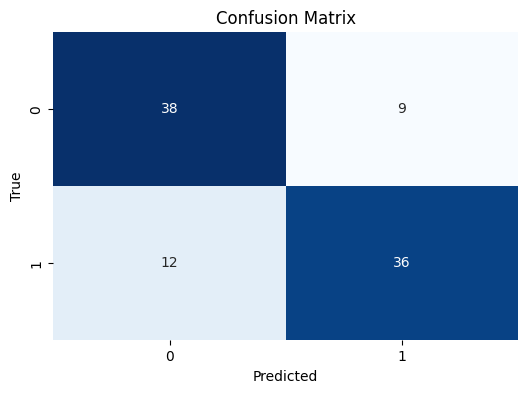

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        47
           1       0.80      0.75      0.77        48

    accuracy                           0.78        95
   macro avg       0.78      0.78      0.78        95
weighted avg       0.78      0.78      0.78        95

Accuracy Score: 77.89%


Random Forest:
Training Score: 1.0
Validation Score: 0.8105263157894737
Mean Absolute Error: 0.18947368421052632


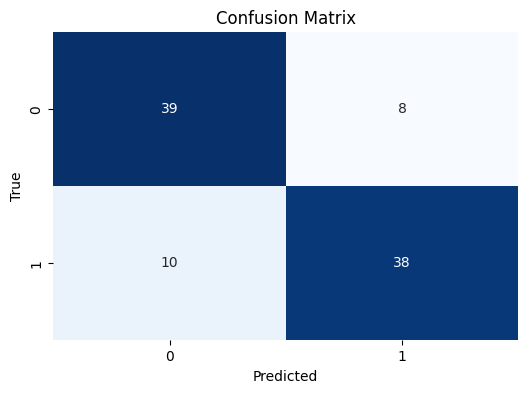

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        47
           1       0.83      0.79      0.81        48

    accuracy                           0.81        95
   macro avg       0.81      0.81      0.81        95
weighted avg       0.81      0.81      0.81        95

Accuracy Score: 81.05%


Support Vector Machines:
Training Score: 0.6074270557029178
Validation Score: 0.6631578947368421
Mean Absolute Error: 0.3368421052631579


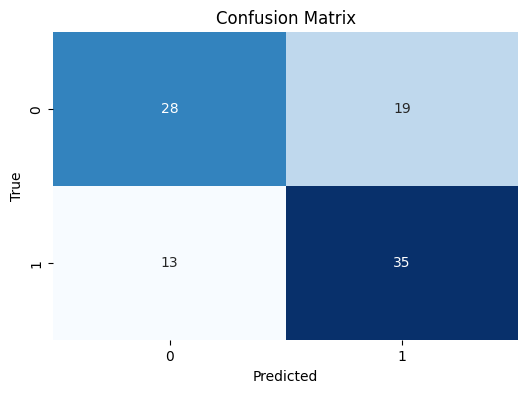

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        47
           1       0.65      0.73      0.69        48

    accuracy                           0.66        95
   macro avg       0.67      0.66      0.66        95
weighted avg       0.67      0.66      0.66        95

Accuracy Score: 66.32%


Gradient Boosting Machines:
Training Score: 0.9628647214854111
Validation Score: 0.8631578947368421
Mean Absolute Error: 0.1368421052631579


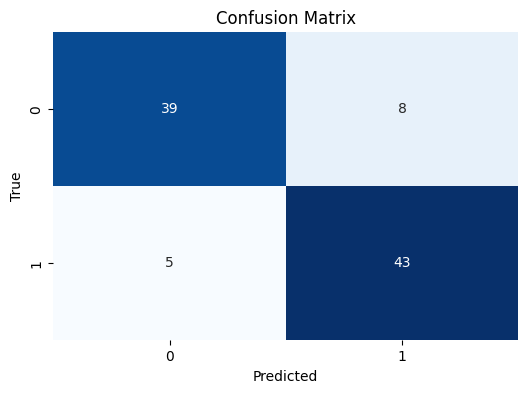

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        47
           1       0.84      0.90      0.87        48

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95

Accuracy Score: 86.32%




In [ ]:
# Step 5: Model Building and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix

# Create instances of the classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gbm = GradientBoostingClassifier()

# Train and evaluate each model
models = [lr, dt, rf, svc, gbm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Gradient Boosting Machines']

# Create a DataFrame to store evaluation metrics
model_df = pd.DataFrame(columns=['Training Score', 'Validation Score', 'Mean Absolute Error'])

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)  # Train the model
    y_train_pred = model.predict(X_train)  # Make predictions on the training set
    y_test_pred = model.predict(X_test)  # Make predictions on the validation set

    training_score = accuracy_score(y_train, y_train_pred)  # Calculate training score
    validation_score = accuracy_score(y_test, y_test_pred)  # Calculate validation score
    mae = mean_absolute_error(y_test, y_test_pred)  # Calculate mean absolute error

    model_df.loc[name] = [training_score, validation_score, mae]

    print(f'{name}:')
    print("Training Score:", training_score)
    print("Validation Score:", validation_score)
    print("Mean Absolute Error:", mae)

   # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test,y_test_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)*100:.2f}%")
    print('\n')

**From the results, we can make the following observations:**

Logistic Regression, Decision Tree, and Random Forest achieved similar
validation scores, around 0.779. However, Random Forest had the lowest mean absolute error (0.189), indicating better predictive accuracy compared to the other two models.

Support Vector Machines (SVM) performed comparatively poorly with a validation score of 0.663 and a relatively high mean absolute error of 0.337.

Gradient Boosting Machines (GBM) achieved the highest validation score of 0.863 and the lowest mean absolute error of 0.137, indicating superior performance compared to the other models.

Based on these results, we can conclude that Gradient Boosting Machines (GBM) outperformed the other models in terms of both accuracy and error. Random Forest also showed good performance.

However, further analysis, such as hyperparameter tuning and cross-validation, is recommended to ensure the robustness of the conclusions and to fine-tune the models for optimal performance on the dataset.

# **Hyperparameter Tuning and Cross-Validation**

In [ ]:

param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Support Vector Machines': {'C': [0.1, 1, 10]},
    'Gradient Boosting Machines': {'learning_rate': [0.1, 0.01, 0.001]}
}

for model, name in zip(models, model_names):
    # Hyperparameter Tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Cross-Validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Model Evaluation
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    training_score = accuracy_score(y_train, y_train_pred)
    validation_score = accuracy_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)

    model_df.loc[name] = [training_score, validation_score, mae]

    print(f'{name}:')
    print("Training Score:", training_score)
    print("Validation Score:", validation_score)
    print("Mean Absolute Error:", mae)
    print("Cross-Validation Score:", mean_cv_score)
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression:
Training Score: 0.7824933687002652
Validation Score: 0.7789473684210526
Mean Absolute Error: 0.22105263157894736
Cross-Validation Score: 0.7822456140350877


Decision Tree:
Training Score: 0.9920424403183024
Validation Score: 0.7789473684210526
Mean Absolute Error: 0.22105263157894736
Cross-Validation Score: 0.7293333333333333


Random Forest:
Training Score: 1.0
Validation Score: 0.8210526315789474
Mean Absolute Error: 0.17894736842105263
Cross-Validation Score: 0.8196491228070176


Support Vector Machines:
Training Score: 0.7374005305039788
Validation Score: 0.7368421052631579
Mean Absolute Error: 0.2631578947368421
Cross-Validation Score: 0.7157543859649123


Gradient Boosting Machines:
Training Score: 0.9628647214854111
Validation Score: 0.8736842105263158
Mean Absolute Error: 0.12631578947368421
Cross-Validation Score: 0.7956140350877193




# **Predicting a Single data**

In [ ]:
pred=best_model.predict([[10.5,0.75,0.560,0.9969,56.0,0.28]])
if pred==0:
    print("Predicted to be Bad Quality Wine")
else:
    print("Predicted to be Good Quality Wine")

Predicted to be Bad Quality Wine


# **Final Comparision & Conclusion**


Based on the above results, the Gradient Boosting Machines model performs the best with the highest validation score (0.8737) and the lowest mean absolute error (0.1263). It also has a high training score and a relatively high cross-validation score, indicating good generalization.

The Random Forest model also performs well with a validation score of 0.8211 and a low mean absolute error of 0.1789. It has a perfect training score but a slightly lower cross-validation score compared to Gradient Boosting Machines.

Logistic Regression, Decision Tree, and Support Vector Machines show lower performance compared to the other two models. They have lower validation scores and higher mean absolute errors. However, it's worth noting that Logistic Regression and Decision Tree models may have convergence issues, as indicated by the convergence warnings.

**Overall, based on the current results, the Gradient Boosting Machines model is recommended for its high accuracy and low error rate, making it a robust choice for predicting the quality of red wine in this dataset.**